In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
from citipy import citipy

In [15]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

belushya guba ru
vestmannaeyjar is
toccoa us
nangomba tz
funadhoo mv
hambantota lk
hithadhoo mv
punta arenas cl
maniitsoq gl
alta floresta br
butaritari ki
khonuu ru
dingle ie
yellowknife ca
thunder bay ca
rikitea pf
khatanga ru
daru pg
chumikan ru
halifax ca
noumea nc
makat kz
ridgecrest us
ponta do sol cv
kaniama cd
ust-ishim ru
albany au
bredasdorp za
illoqqortoormiut gl
rikitea pf
san patricio mx
vaini to
avarua ck
yerbogachen ru
barentsburg sj
jamestown sh
chokurdakh ru
cabo san lucas mx
sistranda no
kelo td
hithadhoo mv
castro cl
busselton au
rikitea pf
chokurdakh ru
temaraia ki
arman ru
vaini to
matara lk
payson us
ushuaia ar
rikitea pf
rikitea pf
umzimvubu za
port elizabeth za
chimore bo
new norfolk au
grand river south east mu
kalmar se
bilibino ru
sarangani ph
saint-joseph re
qaanaaq gl
punta arenas cl
ponta do sol cv
sosua do
conceicao do araguaia br
hilo us
ushuaia ar
altay cn
atuona pf
flinders au
butaritari ki
manzhouli cn
aquin ht
mar del plata ar
tiznit ma
busselton au


cape town za
rikitea pf
hilo us
hilo us
qaanaaq gl
coquimbo cl
kautokeino no
saint-joseph re
ushuaia ar
port lincoln au
saskylakh ru
palabuhanratu id
victoria sc
cape town za
touros br
acapulco mx
rikitea pf
carnarvon au
aix-les-bains fr
thompson ca
avarua ck
belushya guba ru
east london za
busselton au
victoria sc
bundaberg au
georgetown sh
ushuaia ar
viligili mv
yellowknife ca
nioro ml
albany au
alamosa us
marienburg sr
busselton au
igarka ru
borujan ir
rikitea pf
manzil kamil tn
rikitea pf
vaini to
bardiyah ly
avarua ck
victoria sc
tsihombe mg
cabo san lucas mx
vaini to
sabha ly
richards bay za
busselton au
cam ranh vn
yinchuan cn
mirnyy ru
narsaq gl
bethel us
punta arenas cl
hermanus za
hobart au
le port re
barrow us
bang saphan th
new norfolk au
mehamn no
georgetown sh
assiniboia ca
hasaki jp
sisimiut gl
vostok ru
chute-aux-outardes ca
inuvik ca
ribeira grande pt
souillac mu
mahebourg mu
bahia honda cu
katsuura jp
mataura pf
ilulissat gl
tautira pf
taolanaro mg
albany au
dhamtari 

lompoc us
tarakan id
qaanaaq gl
taltal cl
ushuaia ar
amapa br
jamestown sh
labuan my
sao joao da barra br
steubenville us
caravelas br
taolanaro mg
albany au
sao filipe cv
isangel vu
busselton au
port alfred za
hermanus za
mataura pf
albany au
hobart au
cape town za
namibe ao
ouallam ne
puerto ayora ec
rikitea pf
ushuaia ar
kharp ru
vila franca do campo pt
kapaa us
barcelos br
ibra om
bubaque gw
qaanaaq gl
arraial do cabo br
tocopilla cl
ponta do sol cv
esperance au
mataura pf
emba kz
spencer us
puerto ayora ec
busselton au
butaritari ki
riyadh sa
butaritari ki
biak id
busselton au
estelle us
qaanaaq gl
codrington ag
rafraf tn
moss vale au
chandigarh in
dalnerechensk ru
dunmore town bs
ushuaia ar
porto novo cv
geilo no
thompson ca
qaanaaq gl
bin qirdan tn
nouadhibou mr
kluang my
ndjole ga
vaini to
rio gallegos ar
vaini to
suhbaatar mn
minab ir
jahrom ir
khormuj ir
busselton au
minsk by
nelson bay au
hermanus za
narsaq gl
kirtipur np
kapaa us
vanimo pg
port alfred za
viedma ar
illoqqort

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | vestmannaeyjar
Processing Record 3 of Set 1 | toccoa
Processing Record 4 of Set 1 | nangomba
Processing Record 5 of Set 1 | funadhoo
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | maniitsoq
Processing Record 10 of Set 1 | alta floresta
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | khonuu
City not found. Skipping...
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | thunder bay
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | chumikan
Processing Record 20 of Set 1 | halifax
Processing Record 21 of Set 1 | noumea
Processing Rec

Processing Record 37 of Set 4 | balgazyn
Processing Record 38 of Set 4 | nisia floresta
Processing Record 39 of Set 4 | jieshi
Processing Record 40 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | dalvik
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | road town
Processing Record 46 of Set 4 | soyo
Processing Record 47 of Set 4 | vanimo
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | shetpe
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | vanavara
Processing Record 4 of Set 5 | evensk
Processing Record 5 of Set 5 | hovd
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | dongsheng
Processing Record 8 of Set 5 | barranca
Processing

Processing Record 27 of Set 8 | vostok
Processing Record 28 of Set 8 | chute-aux-outardes
Processing Record 29 of Set 8 | inuvik
Processing Record 30 of Set 8 | bahia honda
Processing Record 31 of Set 8 | ilulissat
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | dhamtari
Processing Record 34 of Set 8 | mae sai
Processing Record 35 of Set 8 | octeville
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | olginskaya
Processing Record 38 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 39 of Set 8 | rio grande
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | eenhana
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | gouyave
Processing Record 45 of Set 8 | kalaleh
Processing Record 46 of Set 8 | angoche
Processing Record 47 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 48 of Set 8 | el real de santa maria
P

Processing Record 12 of Set 12 | prachin buri
Processing Record 13 of Set 12 | pital
Processing Record 14 of Set 12 | tarakan
Processing Record 15 of Set 12 | amapa
Processing Record 16 of Set 12 | labuan
Processing Record 17 of Set 12 | steubenville
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | ouallam
Processing Record 20 of Set 12 | kharp
Processing Record 21 of Set 12 | barcelos
Processing Record 22 of Set 12 | ibra
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | tocopilla
Processing Record 25 of Set 12 | emba
Processing Record 26 of Set 12 | spencer
Processing Record 27 of Set 12 | biak
Processing Record 28 of Set 12 | estelle
Processing Record 29 of Set 12 | rafraf
Processing Record 30 of Set 12 | moss vale
Processing Record 31 of Set 12 | chandigarh
Processing Record 32 of Set 12 | dalnerechensk
Processing Record 33 of Set 12 | dunmore town
Processing Record 34 of Set 12 | porto novo
Processing Record 35 of Set 12 | geilo
P

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,50.18,85,100,23.67,IS,2022-07-08 00:23:31
1,Toccoa,34.5773,-83.3324,81.18,89,40,0.00,US,2022-07-08 00:23:32
2,Nangomba,-10.9000,38.5000,62.04,91,8,2.95,TZ,2022-07-08 00:23:32
3,Funadhoo,6.1500,73.2667,81.66,82,99,17.31,MV,2022-07-08 00:23:33
4,Hambantota,6.1241,81.1185,78.40,82,92,14.45,LK,2022-07-08 00:23:33
5,Hithadhoo,-0.6000,73.0833,81.41,77,100,4.97,MV,2022-07-08 00:23:34
6,Punta Arenas,-53.1500,-70.9167,26.71,93,0,4.61,CL,2022-07-08 00:23:34
7,Maniitsoq,65.4167,-52.9000,42.17,93,100,0.96,GL,2022-07-08 00:23:35
8,Alta Floresta,-9.8756,-56.0861,79.14,44,23,4.14,BR,2022-07-08 00:23:37
9,Butaritari,3.0707,172.7902,81.95,77,86,15.52,KI,2022-07-08 00:23:40


In [19]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2022-07-08 00:23:31,63.4427,-20.2734,50.18,85,100,23.67
1,Toccoa,US,2022-07-08 00:23:32,34.5773,-83.3324,81.18,89,40,0.00
2,Nangomba,TZ,2022-07-08 00:23:32,-10.9000,38.5000,62.04,91,8,2.95
3,Funadhoo,MV,2022-07-08 00:23:33,6.1500,73.2667,81.66,82,99,17.31
4,Hambantota,LK,2022-07-08 00:23:33,6.1241,81.1185,78.40,82,92,14.45
5,Hithadhoo,MV,2022-07-08 00:23:34,-0.6000,73.0833,81.41,77,100,4.97
6,Punta Arenas,CL,2022-07-08 00:23:34,-53.1500,-70.9167,26.71,93,0,4.61
7,Maniitsoq,GL,2022-07-08 00:23:35,65.4167,-52.9000,42.17,93,100,0.96
8,Alta Floresta,BR,2022-07-08 00:23:37,-9.8756,-56.0861,79.14,44,23,4.14
9,Butaritari,KI,2022-07-08 00:23:40,3.0707,172.7902,81.95,77,86,15.52


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

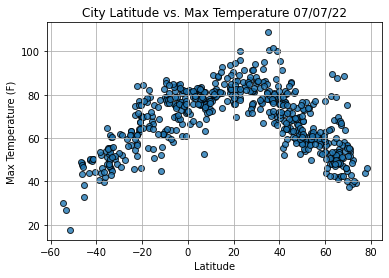

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

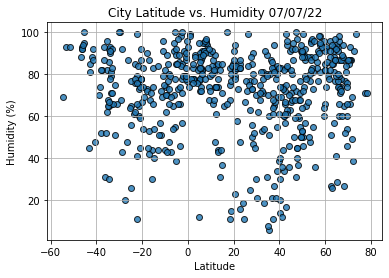

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

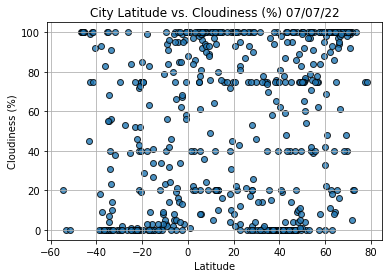

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

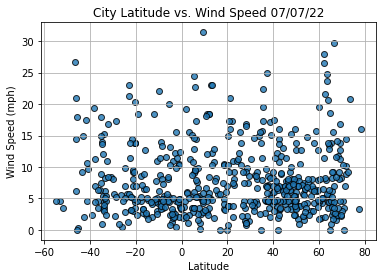

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()